In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest

In [7]:
df = pd.read_csv('enem_2019.csv')
df

,inscricao,idade,sexo,conclusao_ens_med,tipo_ens_med,treineiro,cadeira_canhoto,gestante,idoso,celular_na_residencia,...,pessoas_na_residencia,renda_mensal_familiar,nota_ct,nota_ch,nota_lc,nota_mt,nota_redacao,estado,municipio,municipio_id
0,1,21,M,Concluído,1,0,0,0,0,1,...,7,<= 998.00,472.9,466.0,497.3,369.1,780.0,PA,SANTARÉM,1506807
1,2,16,F,Cursando,1,1,0,0,0,1,...,5,<= 998.00,358.9,495.4,482.3,416.5,600.0,PA,MÃE DO RIO,1504059
2,3,18,F,Cursando,3,0,0,0,0,1,...,3,998.00 até 1497.00,574.2,538.7,582.6,571.5,640.0,PA,PARAGOMINAS,1505502
3,4,23,M,Cursando,2,0,0,0,0,1,...,3,998.00 até 1497.00,NaN,NaN,NaN,NaN,NaN,PA,SÃO SEBASTIÃO DA BOA VISTA,1507706
4,5,23,M,Concluído,1,0,0,0,0,1,...,5,998.00 até 1497.00,NaN,NaN,NaN,NaN,NaN,PA,JURUTI,1503903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095265,5095266,28,F,Concluído,1,0,0,0,0,1,...,1,998.00 até 1497.00,NaN,NaN,NaN,NaN,NaN,BA,SANTO AMARO,2928604
5095266,5095267,25,M,Concluído,1,0,0,0,0,1,...,2,Nenhuma Renda,NaN,NaN,NaN,NaN,NaN,BA,SALVADOR,2927408
5095267,5095268,18,F,Concluído,1,0,0,0,0,1,...,5,Nenhuma Renda,NaN,NaN,NaN,NaN,NaN,BA,TREMEDAL,2931806
5095268,5095269,16,M,Cursando,1,1,0,0,0,1,...,6,4990.00 até 5988.00,458.8,380.6,493.1,396.7,800.0,BA,SALVADOR,2927408


In [8]:
df_colunas = df[['idade', 'sexo']]
df_colunas

,idade,sexo
0,21,M
1,16,F
2,18,F
3,23,M
4,23,M
...,...,...
5095265,28,F
5095266,25,M
5095267,18,F
5095268,16,M


In [9]:
df.columns

Index(['inscricao', 'idade', 'sexo', 'conclusao_ens_med', 'tipo_ens_med',
       'treineiro', 'cadeira_canhoto', 'gestante', 'idoso',
       'celular_na_residencia', 'internet_na_residencia',
       'pessoas_na_residencia', 'renda_mensal_familiar', 'nota_ct', 'nota_ch',
       'nota_lc', 'nota_mt', 'nota_redacao', 'estado', 'municipio',
       'municipio_id'],
      dtype='object')

Teste Z Enem:

Hipótese nula (H0): média de idade das mulheres que fizeram enem é 20 anos

Hipótese alternativa (H1): média de idade das mulheres que fizeram enem é maior que 20 anos

In [11]:
# Filtrar as mulheres
df_mulheres = df_colunas.loc[df['sexo'] == 'F']

idade_mulheres = df_mulheres['idade']

print(idade_mulheres)

1          16
2          18
6          30
7          26
9          17
           ..
5095262    22
5095264    30
5095265    28
5095267    18
5095269    25
Name: idade, Length: 3031822, dtype: int64


In [12]:
df_mulheres = df_colunas[df_colunas["sexo"] == "F"]
df_mulheres

,idade,sexo
1,16,F
2,18,F
6,30,F
7,26,F
9,17,F
...,...,...
5095262,22,F
5095264,30,F
5095265,28,F
5095267,18,F


In [13]:
df['idade'].mean()

22.08743069552742

In [14]:
idade_mulheres = df_mulheres["idade"].values
idade_mulheres

array([16, 18, 30, ..., 28, 18, 25], dtype=int64)

In [15]:
# Contar as mulheres com a idade maior que 20 anos

x = len(df_mulheres[df_mulheres["idade"] > 20])

In [16]:
# Contar o número total de mulheres

n = len(df_mulheres)

In [17]:
# Hipotése nula
media_hipotese_nula = 20

# Nivel de significância
nivel_significancia = 0.05

In [20]:
# Proporção populacional sob a hipóteses nula (50%)
p0= 0.5

# Calcular o desvio padrão da amostra
desvio_padrao_amostra = np.std(idade_mulheres)

# Usar o desvio padrão da amostra como uma estimativa do desvio padrão populacional
desvio_padrao_populacional = desvio_padrao_amostra

In [19]:
# Executar o teste Z
stat, p_value = proportions_ztest(count=x, nobs=n, value=p0, alternative='larger')
stat, p_value

print(f"Estatística z: {stat}")
print(f"Valor p: {p_value}")

Estatística z: -423.4594208018838
Valor p: 1.0


In [21]:
# Decisão
if p_value < nivel_significancia:
    print("Rejeitamos a hipótese nula. A proporção de mulheres com idade maior que 20 anos é maior que 50%.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências suficientes para concluir que a proporção de mulheres com idade maior que 20 anos é maior que 50%.")

Não rejeitamos a hipótese nula. Não há evidências suficientes para concluir que a proporção de mulheres com idade maior que 20 anos é maior que 50%.


Text(0.5, 1.0, 'Gráfico de Distribuição Normal com Área do Valor p')

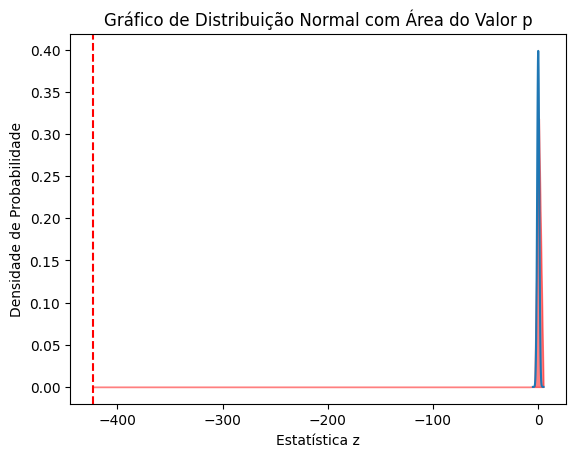

In [22]:
# Criar o gráfico da distribuição normal
x = np.linspace(-5, 5, 100)
y = norm.pdf(x)
plt.plot(x, y)

# Marcar a estatística z
plt.axvline(stat, color='red', linestyle='--')

# Sombrear a área do valor p
x_shade = np.linspace(stat, 5, 100)
y_shade = norm.pdf(x_shade)
plt.fill_between(x_shade, y_shade, color='red', alpha=0.5)

# Rotular os eixos
plt.xlabel("Estatística z")
plt.ylabel("Densidade de Probabilidade")
plt.title("Gráfico de Distribuição Normal com Área do Valor p")